<a href="https://colab.research.google.com/github/ppseguel/jobskillmatching/blob/master/industry_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Installing features newest functions from scikit-learn, including multilabel confusion matrix. If this function if not require, just install the other packages.
!pip install git+http://github.com/scikit-learn/scikit-learn.git


  Cloning http://github.com/scikit-learn/scikit-learn.git to /tmp/pip-req-build-iy_h91mw
  Running command git clone -q http://github.com/scikit-learn/scikit-learn.git /tmp/pip-req-build-iy_h91mw
  Stored in directory: /tmp/pip-ephem-wheel-cache-5lvh_3kh/wheels/ec/59/9a/0fba63f83339d1b28888fbe388362cacb251b22521267a64e5
Successfully built scikit-learn


In [7]:
#Install packages for problem transformarion with scikit-multilearn
#!pip install -q skmultilearn.adapt
!pip install scikit-multilearn



     |████████████████████████████████| 92kB 5.5MB/s 


In [0]:
#import dataset
#follow this documentation, using Github, https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

import pandas as pd

url = 'https://raw.githubusercontent.com/ppseguel/jobskillmatching/master/marketingintern_industry.csv'
job_data = pd.read_csv(url)
#job_data = pd.read_csv(url, sep=',').values
#job_data = pd.DataFrame(job_data)
#job_data = job_data.values

#filling blank cells
df = pd.DataFrame(job_data)
df1 = df.fillna(0)

df1.columns
df1 = df1.rename(columns={"Unnamed: 0": "id", "Linkedin/bloomberg":"LinkedInBloomerg"})




In [0]:
#Checking the dataset
#print(job_data)
#print(df1)
#df1.head()
#job_data.head()

#print(job_data.Groups, job_data.tableau)


In [0]:
#EXPERIMENT 1 (EDIT DATASET)

# 1. Construct Datasets for Training and Evaluation
#selecting y and x variables

#splitting the dataset into the source variables (independant variables) and the target variable (dependant variable)
#sourcevars = d[["agr","art"] #all columns except the last one
#targetvar = df[1] #only the last column

sourcevars = df1[df1.columns[-31:-1]] # Remember, Python is 0-offset! The "3rd" entry is at slot 2.           
targetvar = df1[df1.columns[1:18]] # Remember, Python is 0-offset! The "3rd" entry is at slot 2.
               
X = sourcevars
y = targetvar

#y_names = targetvar.names

#targetvar.head()
#print(y)
#print(X)

In [5]:
# b) Construct Datasets for Training and Evaluation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=42)
print("Number samples in training: ", len(X_train))
print("Number samples in testing: ", len(X_test))


Number samples in training:  514
Number samples in testing:  172


In [0]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [7]:
#EXPERIMENT 1

#1) a) Decision Tree Classifier, performance metrics
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score




# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
#tree_giniIndex = ClassifierChain(DecisionTreeClassifier(criterion='entropy', max_depth=15))
tree_giniIndex = LabelPowerset(DecisionTreeClassifier(criterion='entropy', max_depth=15))

#tree_giniIndex2 = DecisionTreeClassifier(criterion='entropy', max_depth=15, class_weight="balanced")


# train
tree_giniIndex.fit(X_train_norm, y_train)
#tree_giniIndex2.fit(X_train_norm, y_train)

# predict
y_predict_DT = tree_giniIndex.predict(X_test_norm)
#y_predict_DT2 = tree_giniIndex2.predict(X_test)

#Accuracy score
accuracy_DT = accuracy_score(y_test,y_predict_DT)
print("Accuracy:", accuracy_DT)

#F1 measures
f1_score_DT = f1_score(y_test,y_predict_DT, average=None)
print("F1 per sample:", f1_score_DT)

f1_score_DT_micro = f1_score(y_test,y_predict_DT, average="micro")
print("F1_micro:", f1_score_DT_micro)

f1_score_DT_macro = f1_score(y_test,y_predict_DT, average="macro")
print("F1_macro:",f1_score_DT_macro)

#Recall measures
recall_score_DT = recall_score(y_test,y_predict_DT, average=None)
print("recall_score per sample:",recall_score_DT)

recall_score_DT_micro = recall_score(y_test,y_predict_DT, average="micro")
print("recall_score micro:",recall_score_DT_micro)

recall_score_DT_macro = recall_score(y_test,y_predict_DT, average="macro")
print("recall_score macro:",recall_score_DT_macro)

#Precision measures
precision_score_DT = precision_score(y_test,y_predict_DT, average=None)
print("precision per sample:",recall_score_DT)

precision_score_DT_micro = precision_score(y_test,y_predict_DT, average="micro")
print("precision micro:",precision_score_DT_micro)

precision_score_DT_macro = precision_score(y_test,y_predict_DT, average="macro")
print("precision macro:",precision_score_DT_macro)


#f1_score_DT = f1_score(y_test,y_predict_DT, average="binary")

#f1_score_DT2 = f1_score(y_test,y_predict_DT2, average=None)
#f1_score_DT2 = f1_score(y_test,y_predict_DT2, average="weighted")

#roc1 = roc_auc_score(y_test,y_predict_DT)
#roc2 = roc_auc_score(y_test,y_predict_DT2)

#print(f1_score_DT2)

#print(roc1)
#print(roc2)



Accuracy: 0.22093023255813954
F1 per sample: [0.         0.         0.28571429 0.375      0.         0.27906977
 0.27272727 0.3        0.07407407 0.         0.32258065 0.2962963
 0.26666667 0.09756098 0.19354839 0.24615385 0.2       ]
F1_micro: 0.2583025830258303
F1_macro: 0.18878777746718373
recall_score per sample: [0.         0.         0.26315789 0.4        0.         0.24
 0.25714286 0.375      0.14285714 0.         0.32258065 0.28571429
 0.25       0.1        0.25       0.23529412 0.25      ]
recall_score micro: 0.2631578947368421
recall_score macro: 0.19833805548585157
precision per sample: [0.         0.         0.26315789 0.4        0.         0.24
 0.25714286 0.375      0.14285714 0.         0.32258065 0.28571429
 0.25       0.1        0.25       0.23529412 0.25      ]
precision micro: 0.2536231884057971
precision macro: 0.18723225552310976


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:

# a) Train and evaluate a decision treel model

# using classifier chains
#from skmultilearn.problem_transform import ClassifierChain
#from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
#from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


#normalization

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


# Perform 10-fold cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=2)
tree_scores = cross_val_score(tree_giniIndex, X, y, cv=kfold, scoring="f1_micro")
print("Cross-validation score:\n{}".format(tree_scores))
print("Average cross-validation score: {:.2f}".format(tree_scores.mean()))
print("Standard deviation: {:.2f}".format(tree_scores.std()))

# Tune Decision Tree hyperparameter using cross-validation
best_score = 0
for max_d in [1,2,3,4,5,6,7,8,9,11,13,15,17,18,19]:
    
    #tree_giniIndex = ClassifierChain(DecisionTreeClassifier(criterion='gini', max_depth=max_d, class_weight="balanced").fit(X_train_norm, y_train))
    #tree_giniIndex = BinaryRelevance(DecisionTreeClassifier(max_depth=max_d).fit(X_train_norm, y_train))
    #tree_giniIndex = LabelPowerset(DecisionTreeClassifier(max_depth=max_d).fit(X_train_norm, y_train))
    #tree_giniIndex = LabelPowerset(DecisionTreeClassifier(criterion='entropy', max_depth=max_d, class_weight="balanced").fit(X_train_norm, y_train))
    tree_giniIndex = LabelPowerset(DecisionTreeClassifier(criterion='entropy', max_depth=max_d).fit(X_train_norm, y_train))

    fold_accuracies = cross_val_score(tree_giniIndex, X_train_norm, y_train, cv=kfold, scoring="f1_micro") 
    score = fold_accuracies.mean()
    
    print("Score for depth of " + str(max_d) + "on validation set is {:0.2f}".format(score))
    
    #Best score for best optimal model
    
    if score > best_score:
        best_param = {'max_depth': max_d}
        best_score = score
        
#Part of the answer of question 3        
tree_giniIndex = DecisionTreeClassifier(**best_param)
tree_giniIndex.fit(X_train_norm, y_train)
test_score = tree_giniIndex.score(X_test_norm, y_test)
print("Best score on cross-validation: {:0.2f}".format(best_score))
print("Best parameters: {}".format(best_param))
print("Test set score: {:.2f}".format(test_score))


Cross-validation score:
[0.21505376 0.29107981 0.27966102 0.28019324 0.20909091 0.30630631
 0.24299065 0.30697674 0.28828829 0.19811321]
Average cross-validation score: 0.26
Standard deviation: 0.04
Score for depth of 1on validation set is 0.14
Score for depth of 2on validation set is 0.17
Score for depth of 3on validation set is 0.16
Score for depth of 4on validation set is 0.19
Score for depth of 5on validation set is 0.18
Score for depth of 6on validation set is 0.19
Score for depth of 7on validation set is 0.18
Score for depth of 8on validation set is 0.19
Score for depth of 9on validation set is 0.20
Score for depth of 11on validation set is 0.22
Score for depth of 13on validation set is 0.23
Score for depth of 15on validation set is 0.23
Score for depth of 17on validation set is 0.23
Score for depth of 18on validation set is 0.22
Score for depth of 19on validation set is 0.22
Best score on cross-validation: 0.23
Best parameters: {'max_depth': 17}
Test set score: 0.20


In [9]:
#2 b) KneighborsClassifier performance metrics
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score



#normalization

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
#Knclassifier = ClassifierChain(KNeighborsClassifier(n_neighbors=1, p =1, metric="minkowski"))
Knclassifier = LabelPowerset(KNeighborsClassifier(n_neighbors=1, p =1, metric="minkowski"))

# train
Knclassifier1 =Knclassifier.fit(X_train_norm, y_train)

# predict
y_predict_KN = Knclassifier1.predict(X_test_norm)

accuracy_KN= accuracy_score(y_test,y_predict_KN)

f1_score_KN= f1_score(y_test,y_predict_KN, average=None)

f1_score_KN_micro= f1_score(y_test,y_predict_KN, average="micro")
f1_score_KN_macro= f1_score(y_test,y_predict_KN, average="macro")


recall_KN= recall_score(y_test,y_predict_KN, average=None)
recall_KN_micro= recall_score(y_test,y_predict_KN, average="micro")
recall_KN_macro= recall_score(y_test,y_predict_KN, average="macro")


precision_KN= precision_score(y_test,y_predict_KN, average=None)
precision_KN_micro= precision_score(y_test,y_predict_KN, average="micro")
precision_KN_macro= precision_score(y_test,y_predict_KN, average="macro")



print("Accuracy:",accuracy_KN)
print("f1 score per sample:",f1_score_KN)
print("f1score_micro",f1_score_KN_micro)
print("f1score_macro",f1_score_KN_macro)
print("recall per sample:",recall_KN)
print("recall_micro",recall_KN_micro)
print("recall_macro",recall_KN_macro)

print("precision per sample:",precision_KN)
print("precision_micro",precision_KN_micro)
print("precision_macro",precision_KN_macro)




Accuracy: 0.22674418604651161
f1 score per sample: [0.         0.         0.36363636 0.28125    0.         0.3255814
 0.16949153 0.35294118 0.11764706 0.         0.33333333 0.35087719
 0.17391304 0.15384615 0.20689655 0.3125     0.16666667]
f1score_micro 0.263653483992467
f1score_macro 0.19462238010200328
recall per sample: [0.         0.         0.31578947 0.3        0.         0.28
 0.14285714 0.375      0.14285714 0.         0.32258065 0.35714286
 0.25       0.15       0.25       0.29411765 0.25      ]
recall_micro 0.2631578947368421
recall_macro 0.2017849946330275
precision per sample: [0.         0.         0.42857143 0.26470588 0.         0.38888889
 0.20833333 0.33333333 0.1        0.         0.34482759 0.34482759
 0.13333333 0.15789474 0.17647059 0.33333333 0.125     ]
precision_micro 0.2641509433962264
precision_macro 0.1964423547433991


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [10]:
#2 b)  Train and evaluate a K-Nearest Neighbors, tuning hyperparameters


#from skmultilearn.problem_transform import ClassifierChain
#from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

#training_accuracy = []
#test_accuracy = []
knn_best_score=0
neighbor_settings = range(1, 11)
distance_metrics = range(1, 3)
for n_neighbors in neighbor_settings:
    for p in distance_metrics:
        #knn_clf = ClassifierChain(KNeighborsClassifier(n_neighbors=n_neighbors, p=p))
        #knn_clf = BinaryRelevance(KNeighborsClassifier(n_neighbors=n_neighbors, p=p))
        knn_clf = LabelPowerset(KNeighborsClassifier(n_neighbors=n_neighbors, p=p, metric="minkowski"))
        fold_accuracies = cross_val_score(knn_clf, X_train_norm, y_train, cv=kfold, scoring="f1_micro")
        score = fold_accuracies.mean()
        if score > knn_best_score: 
            knn_best_score = score
            knn_clf_best_parameters={'n_neighbors': n_neighbors,'p': p}
        

print("Average cross-validation score: {:.10f}".format(knn_best_score))
print("Best parameter:", knn_clf_best_parameters)

Average cross-validation score: 0.2559932432
Best parameter: {'n_neighbors': 1, 'p': 1}


In [11]:
#MULTILABEL CONFUSION MATRIX for Decision TRee
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix


#multilabel_confusion_matrix(y_true, y_pred, sample_weight=None, labels=None, samplewise=False)
cm = multilabel_confusion_matrix(y_test, y_predict_DT, sample_weight=None, samplewise=False)

print(cm)

#[[TN, FP], 
# [FN,TP]], ith True on the left (Neg, Pos) and predict on the top (Neg, Pos)

#f1_score_DT = f1_score(y_test,y_predict_DT, average=None)

#labels=["agr","art","cons","corp","edu","fin","good","gov","hlth","leg","man","med","org","rec","serv","tech","tran"],

[[[171   1]
  [  0   0]]

 [[169   0]
  [  3   0]]

 [[142  11]
  [ 14   5]]

 [[120  22]
  [ 18  12]]

 [[167   3]
  [  2   0]]

 [[135  12]
  [ 19   6]]

 [[115  22]
  [ 26   9]]

 [[155   9]
  [  5   3]]

 [[146  19]
  [  6   1]]

 [[172   0]
  [  0   0]]

 [[120  21]
  [ 21  10]]

 [[126  18]
  [ 20   8]]

 [[159   5]
  [  6   2]]

 [[133  19]
  [ 18   2]]

 [[144  16]
  [  9   3]]

 [[115  23]
  [ 26   8]]

 [[163   5]
  [  3   1]]]


Text(91.68, 0.5, 'predicted label')

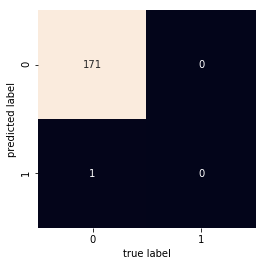

In [12]:
#Plot a confusion matrix for each targeted label using the values of the Multilabel decision matrix on the Decision Tree
#label "agr"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[171,1], [0,0]])
       
#mat = np.array([[1, 0],[0, 1]])       
       
#mat = multilabel_confusion_matrix(y_test, y_predict_DT, sample_weight=None, samplewise=False)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

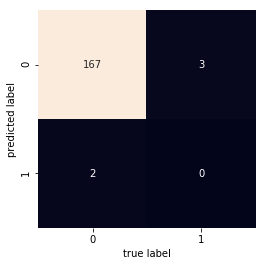

In [13]:
#label "art"
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[167,2], [3,0]])
       
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

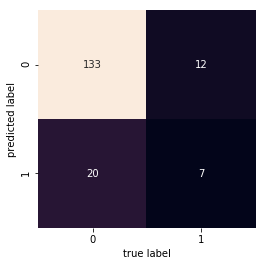

In [14]:
#label "cons"
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[133,20], [12,7]])
       
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')


Text(91.68, 0.5, 'predicted label')

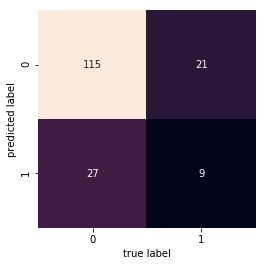

In [15]:
#label "corp"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[115,27], [21,9]])
       
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')


Text(91.68, 0.5, 'predicted label')

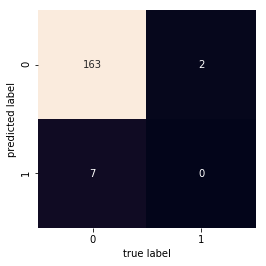

In [16]:
#label "edu"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[163,7], [2,0]])
       
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')


Text(91.68, 0.5, 'predicted label')

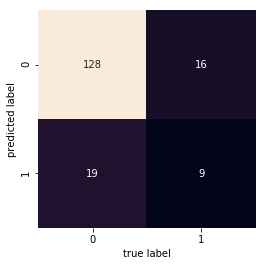

In [17]:
#label ""fin"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[128,19], [16,9]])
       
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')


Text(91.68, 0.5, 'predicted label')

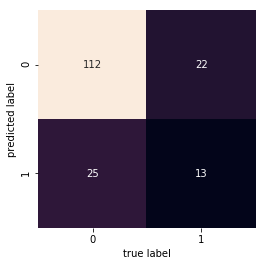

In [18]:
#label "good"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[112,25], [22,13]])
       
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')


Text(91.68, 0.5, 'predicted label')

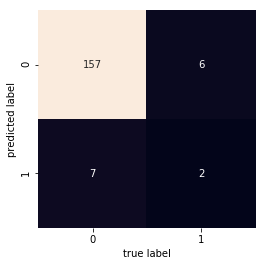

In [19]:
#label "gov"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[157,7], [6,2]])
       
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')


Text(91.68, 0.5, 'predicted label')

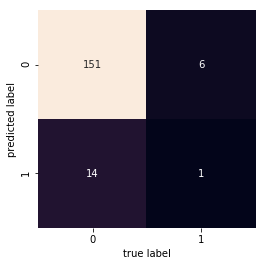

In [20]:
#label "hlth"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[151,14], [6,1]])
       
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')


Text(91.68, 0.5, 'predicted label')

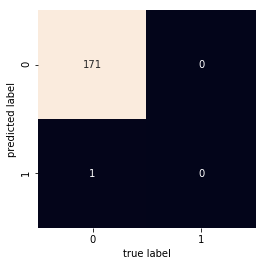

In [21]:
#label "leg"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[171,1], [0,0]])
       
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')


Text(91.68, 0.5, 'predicted label')

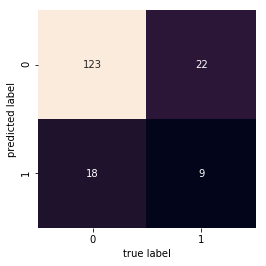

In [22]:
#label "man"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[123,18], [22,9]])
       
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')


Text(91.68, 0.5, 'predicted label')

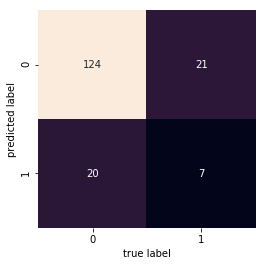

In [23]:
#label "med"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix


mat = np.array([[124,20], [21,7]])
       
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')


Text(91.68, 0.5, 'predicted label')

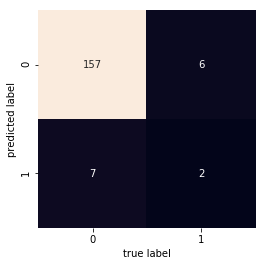

In [24]:
#label "org"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix


mat = np.array([[157,7], [6,2]])
       
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')


Text(91.68, 0.5, 'predicted label')

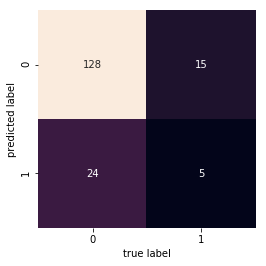

In [25]:
#label "rec"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix


mat = np.array([[128,24], [15,5]])
       
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')


Text(91.68, 0.5, 'predicted label')

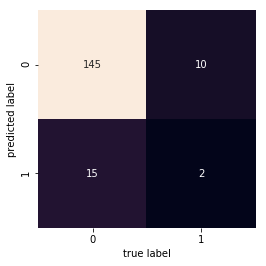

In [26]:
#label "serv"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix


mat = np.array([[145,15], [10,2]])
       
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')


Text(91.68, 0.5, 'predicted label')

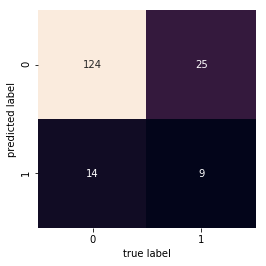

In [27]:
#label "tech"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix


mat = np.array([[124,14], [25,9]])
       
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')


Text(91.68, 0.5, 'predicted label')

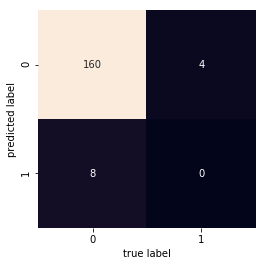

In [28]:
#label "tran"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix


mat = np.array([[160,8], [4,0]])
       
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')


In [29]:
#MULTILABEL CONFUSION MATRIX for KNN
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix


#multilabel_confusion_matrix(y_true, y_pred, sample_weight=None, labels=None, samplewise=False)
cm = multilabel_confusion_matrix(y_test, y_predict_KN, sample_weight=None, samplewise=False)

print(cm)

#[[TN, FP], 
# [FN,TP]], ith True on the left (Neg, Pos) and predict on the top (Neg, Pos)

#f1_score_DT = f1_score(y_test,y_predict_DT, average=None)

#labels=["agr","art","cons","corp","edu","fin","good","gov","hlth","leg","man","med","org","rec","serv","tech","tran"],

[[[170   2]
  [  0   0]]

 [[167   2]
  [  3   0]]

 [[145   8]
  [ 13   6]]

 [[117  25]
  [ 21   9]]

 [[168   2]
  [  2   0]]

 [[136  11]
  [ 18   7]]

 [[118  19]
  [ 30   5]]

 [[158   6]
  [  5   3]]

 [[156   9]
  [  6   1]]

 [[169   3]
  [  0   0]]

 [[122  19]
  [ 21  10]]

 [[125  19]
  [ 18  10]]

 [[151  13]
  [  6   2]]

 [[136  16]
  [ 17   3]]

 [[146  14]
  [  9   3]]

 [[118  20]
  [ 24  10]]

 [[161   7]
  [  3   1]]]


Text(91.68, 0.5, 'predicted label')

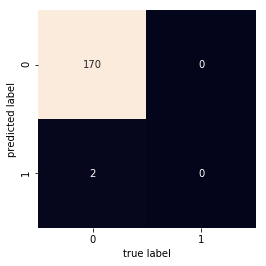

In [30]:
#Plot a confusion matrix for each targeted label using the values of the Multilabel decision matrix on the KN
#label "agr"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[170,2], [0,0]])
       

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

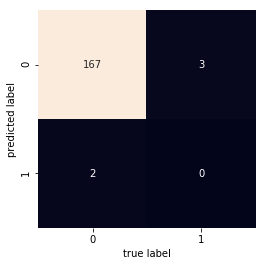

In [31]:
#Plot a confusion matrix for each targeted label using the values of the Multilabel decision matrix on the KN
#label "art"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[167,2], [3,0]])
       

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

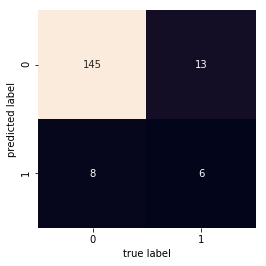

In [32]:
#Plot a confusion matrix for each targeted label using the values of the Multilabel decision matrix on the KN
#label ""cons

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[145,8], [13,6]])
       

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

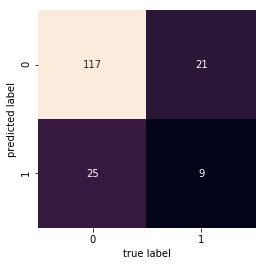

In [33]:
#Plot a confusion matrix for each targeted label using the values of the Multilabel decision matrix on the KN
#label "corp"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[117,25], [21,9]])
       

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

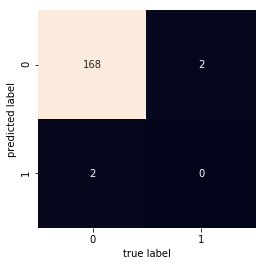

In [34]:
#Plot a confusion matrix for each targeted label using the values of the Multilabel decision matrix on the KN
#label "edu"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[168,2], [2,0]])
       

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

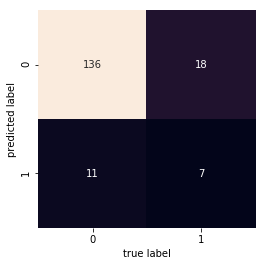

In [35]:
#Plot a confusion matrix for each targeted label using the values of the Multilabel decision matrix on the KN
#label "fin"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[136,11], [18,7]])
       

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

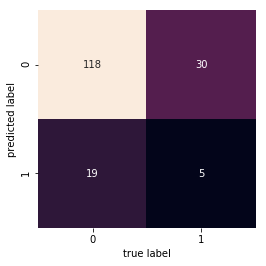

In [36]:
#Plot a confusion matrix for each targeted label using the values of the Multilabel decision matrix on the KN
#label "good"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[118,19], [30,5]])
       

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

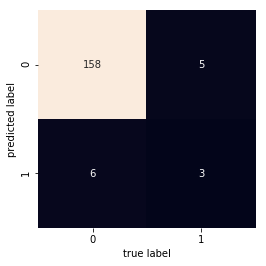

In [37]:
#Plot a confusion matrix for each targeted label using the values of the Multilabel decision matrix on the KN
#label "gov"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[158,6], [5,3]])
       

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

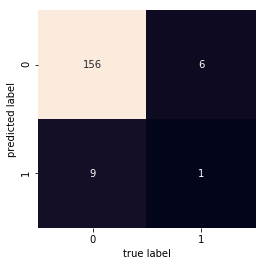

In [38]:
#Plot a confusion matrix for each targeted label using the values of the Multilabel decision matrix on the KN
#label "hlth"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[156,9], [6,1]])
       

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

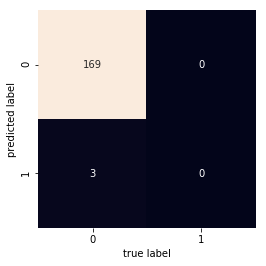

In [39]:
#Plot a confusion matrix for each targeted label using the values of the Multilabel decision matrix on the KN
#label "leg"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[169,3], [0,0]])
       

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

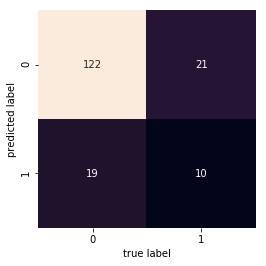

In [40]:
#Plot a confusion matrix for each targeted label using the values of the Multilabel decision matrix on the KN
#label "man"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[122,19], [21,10]])
       

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

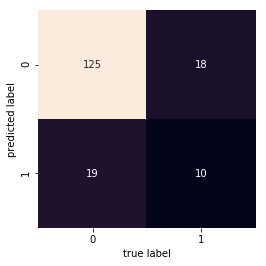

In [41]:
#Plot a confusion matrix for each targeted label using the values of the Multilabel decision matrix on the KN
#label "med"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[125,19], [18,10]])
       

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

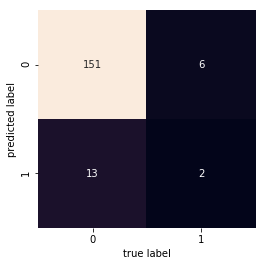

In [42]:
#Plot a confusion matrix for each targeted label using the values of the Multilabel decision matrix on the KN
#label "org"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[151,13], [6,2]])
       

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

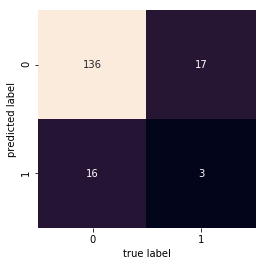

In [43]:
#Plot a confusion matrix for each targeted label using the values of the Multilabel decision matrix on the KN
#label "rec"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[136,16], [17,3]])
       

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

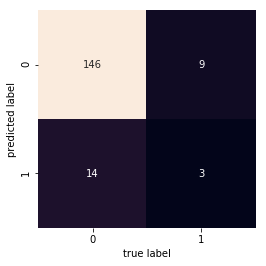

In [44]:
#Plot a confusion matrix for each targeted label using the values of the Multilabel decision matrix on the KN
#label "serv"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[146,14], [9,3]])
       

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

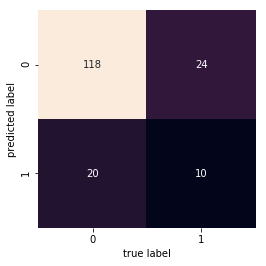

In [45]:
#Plot a confusion matrix for each targeted label using the values of the Multilabel decision matrix on the KN
#label "tech"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[118,20], [24,10]])
       

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(91.68, 0.5, 'predicted label')

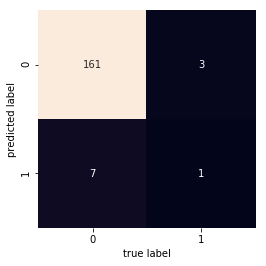

In [46]:
#Plot a confusion matrix for each targeted label using the values of the Multilabel decision matrix on the KN
#label "tran"

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


mat = np.array([[161,7], [3,1]])
       

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

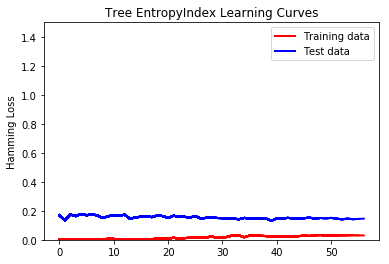

In [49]:
#EXPERIMENT 2
# Plot learning curves
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import label_ranking_loss
from sklearn.metrics import hamming_loss

import matplotlib.pyplot as plt


def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    mms = MinMaxScaler()
    X_train_norm = mms.fit_transform(X_train)
    X_test_norm = mms.transform(X_test)
    train_errors, test_errors = [], []
    for m in range(1, 570, 10):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train_norm[:m])
        y_test_predict = model.predict(X_test_norm)
        train_errors.append(hamming_loss(y_train_predict, y_train[:m]))
        test_errors.append(hamming_loss(y_test_predict, y_test))           
        plt.plot(train_errors, "r-", label="Training data", linewidth = 2)
        plt.plot(test_errors, "b-", linewidth = 2, label="Test data")
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        plt.legend(["Training data","Test data"])
        plt.ylabel('Hamming Loss')
        plt.title('Tree EntropyIndex Learning Curves')
        plt.ylim(0, 1.5)

tree_giniIndex = ClassifierChain(DecisionTreeClassifier(criterion='entropy', max_depth=15))
plot_learning_curves(tree_giniIndex, X, y)


                     

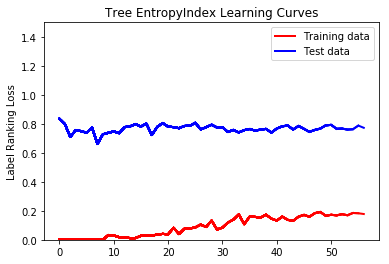

In [50]:
def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    mms = MinMaxScaler()
    X_train_norm = mms.fit_transform(X_train)
    X_test_norm = mms.transform(X_test)
    train_errors, test_errors = [], []
    for m in range(1, 570, 10):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train_norm[:m])
        y_test_predict = model.predict(X_test_norm)
        train_errors.append(label_ranking_loss(y_train_predict, y_train[:m]))
        test_errors.append(label_ranking_loss(y_test_predict, y_test))
        plt.plot(train_errors, "r-", label="Training data", linewidth = 2)
        plt.plot(test_errors, "b-", linewidth = 2, label="Test data")
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        plt.legend(["Training data","Test data"])
        plt.ylabel('Label Ranking Loss')
        plt.title('Tree EntropyIndex Learning Curves')
        plt.ylim(0, 1.5)

tree_giniIndex = ClassifierChain(DecisionTreeClassifier(criterion='entropy', max_depth=15))
plot_learning_curves(tree_giniIndex, X, y)

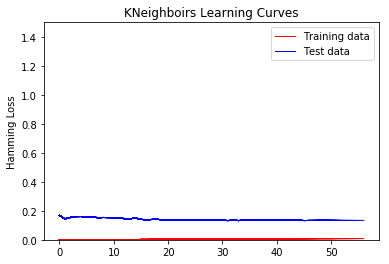

In [51]:
#LEarning curve for KNeighboirs


#b) KneighborsClassifier
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


#normalization

from sklearn.preprocessing import MinMaxScaler



from skmultilearn.problem_transform import ClassifierChain
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import label_ranking_loss
#from sklearn.metrics import hamming_loss

import matplotlib.pyplot as plt

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    mms = MinMaxScaler()
    X_train_norm = mms.fit_transform(X_train)
    X_test_norm = mms.transform(X_test)
    train_errors, test_errors = [], []
    for m in range(1, 570, 10):
        model.fit(X_train_norm[:m], y_train[:m])
        y_train_predict = model.predict(X_train_norm[:m])
        y_test_predict = model.predict(X_test)
        #train_errors.append(label_ranking_loss(y_train_predict, y_train[:m]))
        train_errors.append(hamming_loss(y_train_predict, y_train[:m]))
        #test_errors.append(label_ranking_loss(y_test_predict, y_test))
        test_errors.append(hamming_loss(y_test_predict, y_test))
        plt.plot(train_errors, "r-", linewidth = 1)
        plt.plot(test_errors, "b-", linewidth = 1)
        plt.legend(["Training data","Test data"])
        plt.ylabel('Hamming Loss')
        plt.title('KNeighboirs Learning Curves')
        plt.ylim(0, 1.5)

Knclassifier = ClassifierChain(KNeighborsClassifier(n_neighbors=1, p =1))
plot_learning_curves(Knclassifier, X, y)

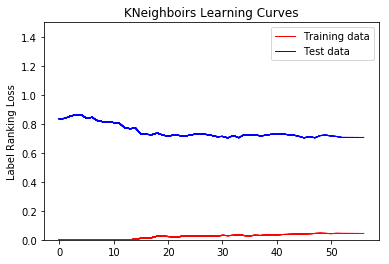

In [52]:
#LEarning curve for KNeighboirs


#b) KneighborsClassifier
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


#normalization

from sklearn.preprocessing import MinMaxScaler



from skmultilearn.problem_transform import ClassifierChain
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import label_ranking_loss
#from sklearn.metrics import hamming_loss

import matplotlib.pyplot as plt

def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    mms = MinMaxScaler()
    X_train_norm = mms.fit_transform(X_train)
    X_test_norm = mms.transform(X_test)
    train_errors, test_errors = [], []
    for m in range(1, 570, 10):
        model.fit(X_train_norm[:m], y_train[:m])
        y_train_predict = model.predict(X_train_norm[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(label_ranking_loss(y_train_predict, y_train[:m]))
        test_errors.append(label_ranking_loss(y_test_predict, y_test))
        plt.plot(train_errors, "r-", linewidth = 1)
        plt.plot(test_errors, "b-", linewidth = 1)
        plt.legend(["Training data","Test data"])
        plt.ylabel('Label Ranking Loss')
        plt.title('KNeighboirs Learning Curves')
        plt.ylim(0, 1.5)

Knclassifier = ClassifierChain(KNeighborsClassifier(n_neighbors=1, p =1))
plot_learning_curves(Knclassifier, X, y)